<a id='toc'></a>

## Workflow

1. [Prep Your Repo](#prep-your-repo)
1. [Import](#import)
1. [Acquire Data](#acquire-data)
1. [Clean, Prep & Split Data](#clean-prep-and-split-data)
1. [Explore Data](#explore-data)
    - [Hypothesis Testing](#hypothesis-testing)
1. [Evaluate Data](#evaluate-data)
1. [Modeling](#modeling)
    - [Identify Baseline](#identify-baseline)
    - [Train / Validate](#train-validate)
    - [Test](#test)
    
- [Requested Data](#requested-data)

8. [2nd Iteration: Acquire Data](#2nd-iteration-acquire-data)
9. [2nd Iteration: Clean, Prep & Split Data](#2nd-iteration-clean-prep-and-split-data)
10. [2nd Iteration: Explore Data](#2nd-iteration-explore-data)
    - [2nd Iteration: Hypothesis Testing](#2nd-iteration-hypothesis-testing)
11. [2nd Iteration: Modeling](#2nd-iteration-modeling)
    - [2nd Iteration: Identify Baseline](#2nd-iteration-identify-baseline)
    - [2nd Iteration: Train / Validate](#2nd-iteration-train-validate)
    - [2nd Iteration: Test](#2nd-iteration-test)


<a id='top'></a>

 [Jump to the bottom of Repo](#bottom)

___
# <a name="prep-your-repo"></a>1. Prep Your Repo

1. Create new repo and name it: 'regression_project'
    - clone

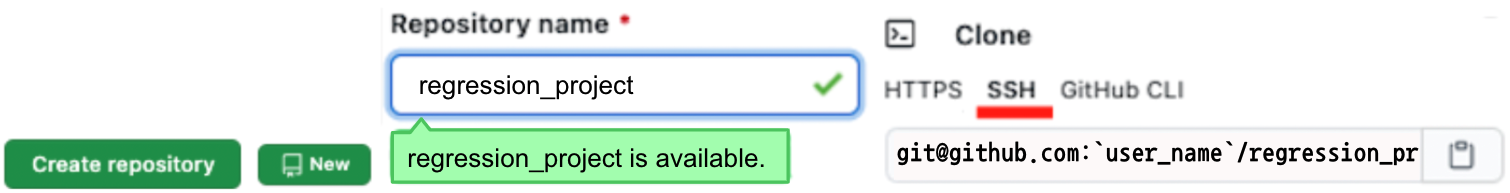

2. Create .gitignore that includes env.py
    - push
3. Create env.py file that stores your MySQL login credentials to obtain `zillow` data.
    - save
    - **confirm it is ignored** (git status)
4. Create README.md file to begin notating steps taken so far.
    - save
    - push
5. Create a Jupyter Lab environment to continue working in.
6. Create Jupyter Notebook to begin data pipeline: `zillow`

___
# <a name="import"></a>2. Import 
Import all necessary libraries and functions. 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangle as wr
import explore as exp
import model as mo


warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

 [Jump to Table of Contents](#toc)

___
# <a name="acquire-data"></a>3. Acquire Data
#### Read `zillow` data from MySQL using the `zillow_df()` function in [`wrangle.py`](wrangle.py)

Recall in our situation, we are asked to handle specific features for the first iteration:
- square feet of the home 
- number of bedrooms
- number of bathrooms
    - in the months of May-August 2017

In [2]:
df = wr.zillow_df()

In [3]:
#preview
df.head(2)

,parcelid,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
0,11721753,1316.0,3.0,2.0,205123.0
1,11289917,1458.0,3.0,2.0,136104.0


#### Initial Exploring
At this stage, I'd like to get introduced to my data and learn about it's size, attributes, and components.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24923 entries, 0 to 24922
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      24923 non-null  int64  
 1   calculatedfinishedsquarefeet  24921 non-null  float64
 2   bedroomcnt                    24923 non-null  float64
 3   bathroomcnt                   24923 non-null  float64
 4   taxvaluedollarcnt             24923 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 973.7 KB


In [8]:
#check for blanks/nulls
df.isnull().sum()

parcelid                        0
calculatedfinishedsquarefeet    2
bedroomcnt                      0
bathroomcnt                     0
taxvaluedollarcnt               0
dtype: int64

In [9]:
#see the rows affected by nulls
df[df["calculatedfinishedsquarefeet"].isnull()]

,parcelid,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
2970,10899068,NaN,2.0,2.0,155392.0
20839,12120518,NaN,0.0,0.0,700690.0


In [10]:
df.describe()

,parcelid,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
count,2.492300e+04,24921.000000,24923.000000,24923.000000,2.492300e+04
mean,1.190811e+07,1708.198989,2.961642,2.253019,4.806395e+05
std,3.350896e+06,919.541786,1.004431,0.993124,6.824336e+05
min,1.071186e+07,240.000000,0.000000,0.000000,1.000000e+03
25%,1.117172e+07,1144.000000,2.000000,2.000000,1.879935e+05
50%,1.179463e+07,1480.000000,3.000000,2.000000,3.349730e+05
75%,1.249933e+07,1988.000000,4.000000,3.000000,5.439070e+05
max,1.676560e+08,17245.000000,11.000000,11.000000,2.385837e+07


One is below the 1st quartile, and the other is above the 3rd. 
I don't foresee any issues simply `drop`ping the two rows.

In [4]:
# get rid of nulls
df = df.dropna()

In [5]:
# check for blanks/nulls
df.isnull().sum()

parcelid                        0
calculatedfinishedsquarefeet    0
bedroomcnt                      0
bathroomcnt                     0
taxvaluedollarcnt               0
dtype: int64

In [13]:
# I still have plenty of data and now 
# all of the features have equal amount of rows.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24921 entries, 0 to 24922
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      24921 non-null  int64  
 1   calculatedfinishedsquarefeet  24921 non-null  float64
 2   bedroomcnt                    24921 non-null  float64
 3   bathroomcnt                   24921 non-null  float64
 4   taxvaluedollarcnt             24921 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


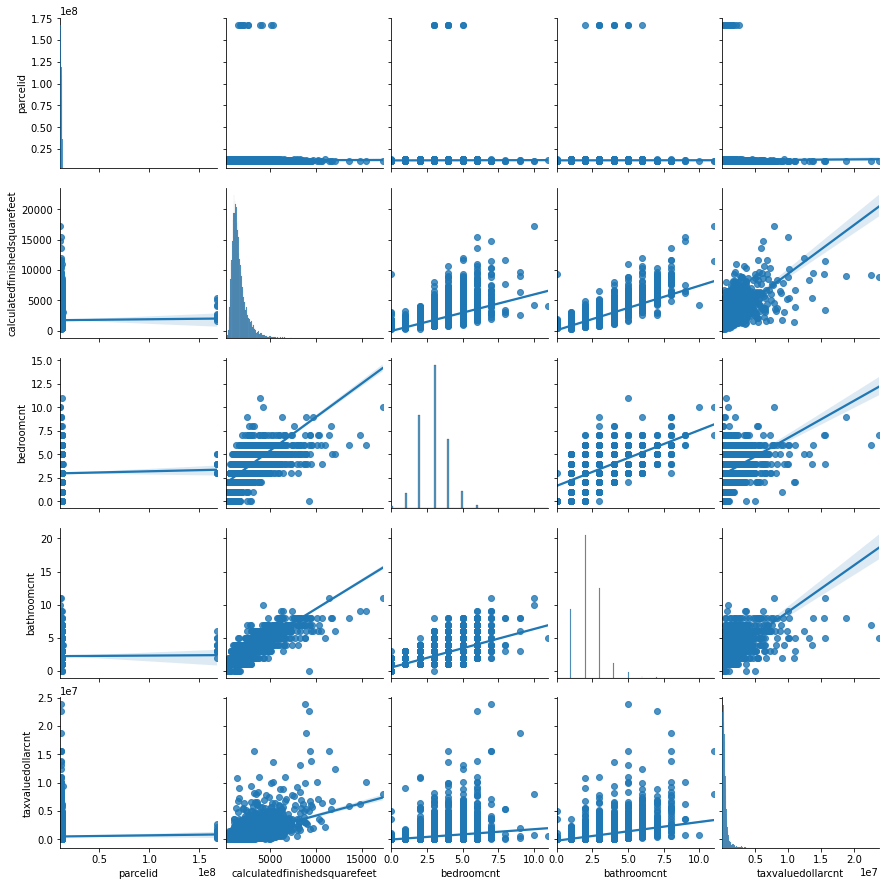

In [6]:
#visualize some relationships at a glance
sns.pairplot(df, kind= "reg")

It's here that I recognize outliers that I may want to remove.
So I dig in deeper...

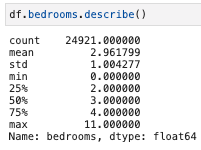 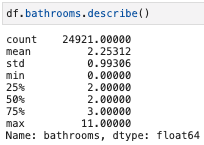 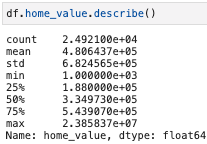 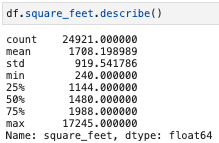


#### Visualize Outliers

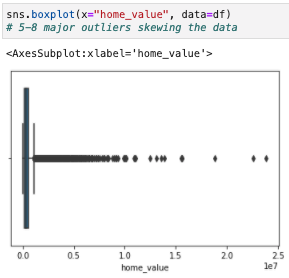 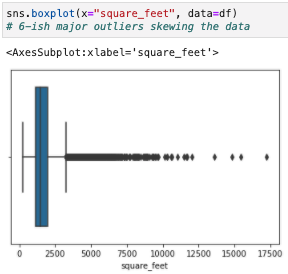


In [17]:
upper_bound, lower_bound = wr.outlier(df, "taxvaluedollarcnt", 1.5)
upper_bound, lower_bound

# having a negative lower bound means: we don't have outliers on the lower end
# upper bound is stating that home_values > 1.07million are outliers

(1077767.5, -345860.5)

In [18]:
# let's remove them upper outliers.
df = df[df.taxvaluedollarcnt < upper_bound]
df.shape

# OG count: 24921

(23133, 4)


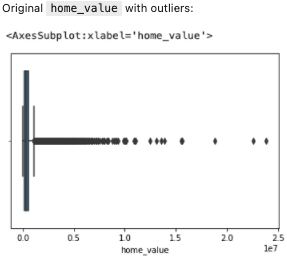 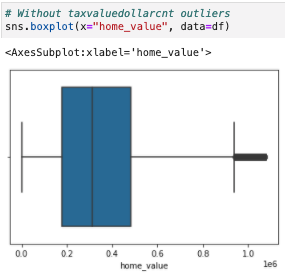

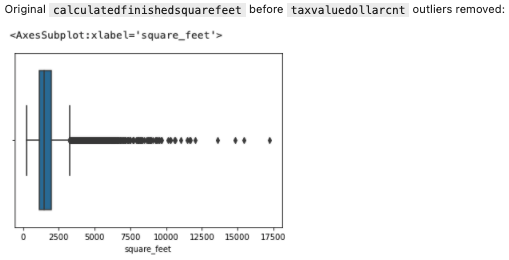 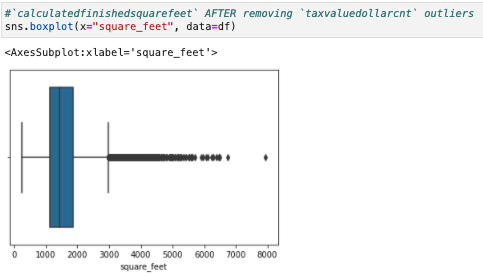

After looking into the `calculatedfinishedsquarefeet` outliers, I had decided to leave them in the datat set and continue.

Removing the `taxvaluedollarcnt` outliers has helped the distribution of the data quite a bit!

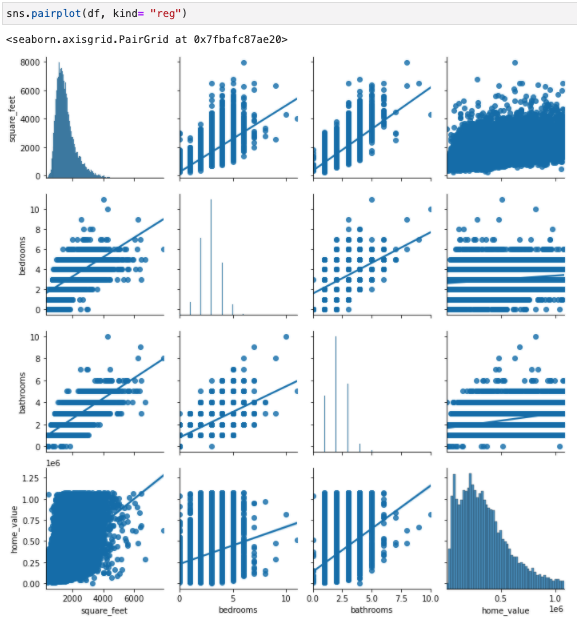

 [Jump to Table of Contents](#toc)

___
# <a name="clean-prep-and-split-data"></a>4. Clean, Prep and Split Data
Using four functions tied to each other in `wrangle.py` file:
- [`clean_zillow()`](wrangle.py)
- [`outlier()`](wrangle.py)
- [`split_zillow`](wrangle.py)
- [`wrangle_zillow`](wrangle.py)

I will perform the cleaning, prepping and splitting of my data:

In [4]:
df = wr.clean_zillow(df)

In [5]:
train, validate, test = wr.wrangle_zillow()

In [6]:
train.shape, validate.shape, test.shape

((12954, 4), (5552, 4), (4627, 4))

In [ ]:
#I'd also like to scale my data at this point
#so I can move into my actual exploration.

In [7]:
train_scaled, validate_scaled, test_scaled = wr.scale_zillow(train, validate, test)

In [8]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((12954, 4), (5552, 4), (4627, 4))

 [Jump to Table of Contents](#toc)

___
# <a name="explore-data"></a>5. Explore Data

#### 5a. List all categorical & quantitative variables/features 
#### And begin with running `explore_univariate` function listed in [`explore.py`](explore.py)

In [8]:
# I'm bummed to only have quantitative data with this
# first iteration, but it is helping me focus on the process

quant_vars = ['home_value', 'square_feet','bedrooms', 'bathrooms']
cat_vars = []

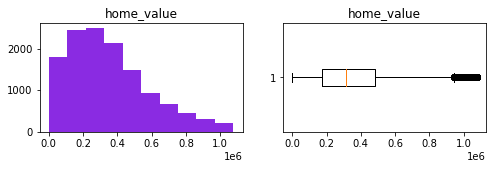

count    1.295400e+04
mean     3.548218e+05
std      2.323006e+05
min      1.000000e+03
25%      1.753500e+05
50%      3.110000e+05
75%      4.829278e+05
max      1.077046e+06
Name: home_value, dtype: float64


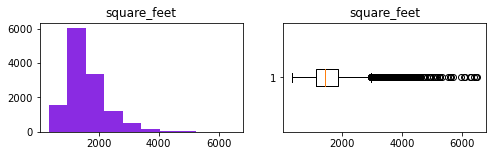

count    12954.000000
mean      1581.045469
std        674.162074
min        326.000000
25%       1124.000000
50%       1430.000000
75%       1857.000000
max       6494.000000
Name: square_feet, dtype: float64


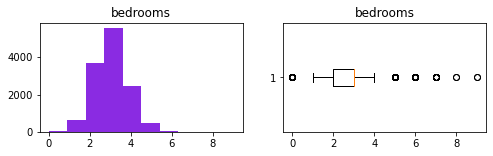

count    12954.000000
mean         2.891231
std          0.956950
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: bedrooms, dtype: float64


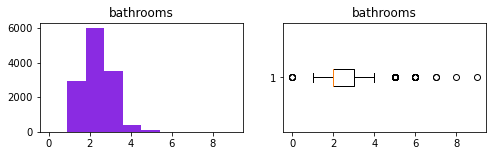

count    12954.000000
mean         2.133935
std          0.836823
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: bathrooms, dtype: float64


In [9]:
exp.explore_univariate(train, cat_vars, quant_vars)

**Univariate takeaways**: 

After removing home_value outliers, it seems 'expensive/large' homes are still pulling my data towards the right. The median household looks like 1430 sqft, 3BD/2BA, with a value of $311_000.


#### 5b. Create a heat map to see correlations at a glance.

(0.0, 4.0)

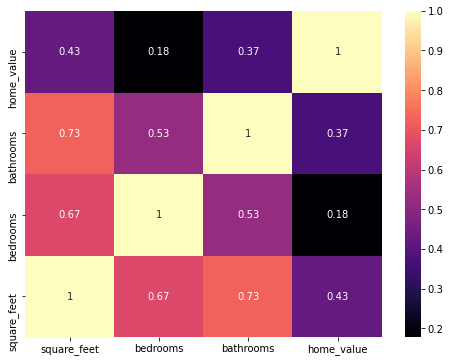

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled.corr(), cmap='magma', annot=True)
plt.ylim(0, 4)

**Heat Map Takeaways**:

Removal of my `home_value` outliers have put a damper on my correlations, most like due to the fact that I have so few features in this first iteration.

#### 5c. Run `jointplot` function listed in [`explore.py`](explore.py) to create another useful visual to see how a single feature may affect our target: `home_value`.

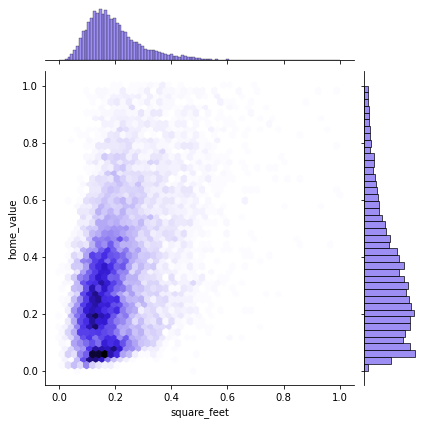

In [11]:
exp.jointplot("square_feet", "home_value", train_scaled)

#This graph tells me a majority of homes are in the bottom 25% of square feet and bottom 45% of home_value. 

 [Jump to Table of Contents](#toc)

___
# <a name="hypothesis-testing"></a>Hypothesis Testing

### During my first iteration, I will be using my `correlation_test` function listed in [`explore.py`](explore.py) to test my hypotheses as they are all concerning quantitative data.



#### Test: There is a relationship between square footage and home value.

In [12]:
#assign your null hypothesis
nullh = "No correlation between square footage and home value."

#and your alternative hypothesis
alth = "There IS a correlation between square footage and home value."

#the feature you are testing
x1 = train_scaled.square_feet

#against your target
y1 = train_scaled.home_value

Reject null statment: No correlation between square footage and home value.
There is a linear relationship.
Although, it is a positive weak one.

    Correlation Coefficient: 0.42675216032970326
    p: 0.0
    
    


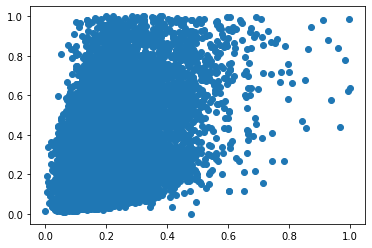

In [13]:
exp.correlation_test(nullh, alth, x1, y1)

#### Test: There is a weak correlation between number of bathrooms and home value.

In [14]:
nullh = "No correlation between number of bathrooms and home value."
alth = "There IS a correlation between bathrooms and home value."
x2 = train_scaled.bathrooms
y2 = train_scaled.home_value

Reject null statment: No correlation between number of bathrooms and home value.
There is a linear relationship.
Although, it is a positive weak one.

    Correlation Coefficient: 0.3719205036923359
    p: 0.0
    
    


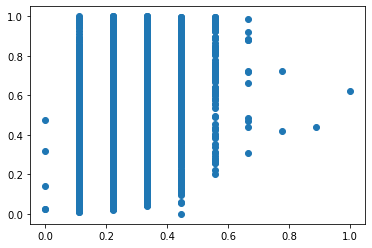

In [15]:
exp.correlation_test(nullh, alth, x2, y2)

#### Test: There is a relationship between number of bedrooms and home value.

In [16]:
nullh = "No correlation between number of bedrooms and home value."
alth = "There IS a correlation between bedrooms and home value."
x3 = train_scaled.bedrooms
y3 = train_scaled.home_value

Reject null statment: No correlation between number of bedrooms and home value.
There is a linear relationship.
Although, it is a positive weak one.

    Correlation Coefficient: 0.17851911278799676
    p: 3.178749449573694e-93
    
    


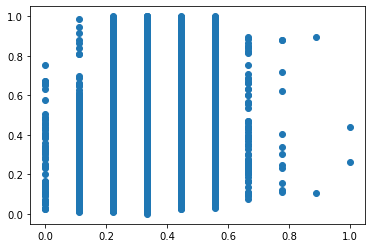

In [17]:
exp.correlation_test(nullh, alth, x3, y3)

It seems that there is a technical correlation with all three features, allbeit low, I will use them to run my models.

 [Jump to Table of Contents](#toc)

___
# <a name="evaluate-data"></a>6. Evaluate Data


In [9]:
#identify your 'objects'/categorical data
object_cols = mo.get_object_cols(df)
object_cols

[]

In [10]:
#split the df again to create dataframes containing the features (X)
#and series containing my target (y)

X_train, X_train_scaled, y_train, X_validate, X_validate_scaled, y_validate, X_test, X_test_scaled, y_test = mo.prep4model(df, 'home_value')

In [11]:
#identify your 'numerical'/quantitative data
numeric_cols = mo.get_numeric_X_cols(X_train, object_cols)
numeric_cols

['square_feet', 'bedrooms', 'bathrooms']

In [12]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape

((12954, 3),
 (12954, 3),
 (12954,),
 (5552, 3),
 (5552, 3),
 (5552,),
 (4627, 3),
 (4627, 3),
 (4627,))

In [30]:
# check the feature importance:
f_feature = mo.select_kbest(X_train_scaled, y_train, 3)
f_feature

['square_feet', 'bedrooms', 'bathrooms']

In [31]:
# confirm feature importance:
rfe_feature = mo.rfe(X_train_scaled, y_train, 3)
rfe_feature 

['square_feet', 'bedrooms', 'bathrooms']

Interestingly, `bathrooms` seems to hold the most weight!

 [Jump to Table of Contents](#toc)

___
# <a name="modeling"></a>7. Modeling

In [13]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [33]:
#preview
y_train.head()

,home_value
parcelid,
10764018,61876.0
12294024,36434.0
11075339,150304.0
12215425,272000.0
12055943,809160.0


 [Jump to Table of Contents](#toc)

___
# <a name="identify-baseline"></a>• Identify Baseline

In [14]:
# 1. compute pred_median
home_value_baseline_median = y_train['home_value'].median()
y_train['home_value_baseline_median'] = home_value_baseline_median
y_validate['home_value_baseline_median'] = home_value_baseline_median

# 2. compute pred_mean
home_value_baseline_mean = y_train['home_value'].mean()
y_train['home_value_baseline_mean'] = home_value_baseline_mean
y_validate['home_value_baseline_mean'] = home_value_baseline_mean

#check to see which is better
y_train.head()

,home_value,home_value_baseline_median,home_value_baseline_mean
parcelid,,,
10764018,61876.0,311000.0,354821.776826
12294024,36434.0,311000.0,354821.776826
11075339,150304.0,311000.0,354821.776826
12215425,272000.0,311000.0,354821.776826
12055943,809160.0,311000.0,354821.776826


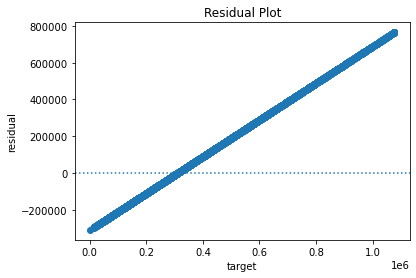

In [35]:
mo.plot_residuals(y_train.home_value, y_train.home_value_baseline_median)

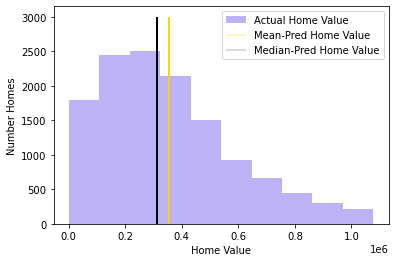

In [36]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.home_value, color='mediumslateblue', alpha=.5, label="Actual Home Value")
plt.vlines(y_train.home_value_baseline_mean, 0, 3000, color='gold', alpha=.3, label="Mean-Pred Home Value")
plt.vlines(y_train.home_value_baseline_median, 0, 3000, color='black', alpha=.2, label="Median-Pred Home Value")
plt.xlabel("Home Value")
plt.ylabel("Number Homes")
plt.legend()
plt.show()

***I will move forward with the median as it is performing better.***

In [15]:
# 3. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.home_value, y_train.home_value_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validate.home_value, y_validate.home_value_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 236389.0
      Validate/Out-of-Sample: 234776.68
        


 [Jump to Table of Contents](#toc)

___
# <a name="train-validate"></a>• Train / Validate

## Modeling: LinearRegression (OLS)

In [16]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm)**(0.5)

# predict validate
y_validate['home_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 206116.98
    Validation/Out-of-Sample: 206824.56



## Modeling: LassoLars

In [17]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.home_value, y_train.home_value_pred_lars)**(0.5)

# predict validate
y_validate['home_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

    RMSE for LassoLars
    
    Training/In-Sample: 206117.18
    Validation/Out-of-Sample: 206816.23



## Modeling: TweedieRegressor (GLM)

In [18]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.home_value, y_train.home_value_pred_glm)**(0.5)

# predict validate
y_validate['home_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
""")



              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

                RMSE for LassoLars
                
                Training/In-Sample: 206117.18
                Validation/Out-of-Sample: 206816.23
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: 232291.65
    Validation/Out-of-Sample: 230326.08



## Modeling: PolynomialFeatures

In [19]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [20]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.home_value)

# predict train
y_train['home_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm2)**(0.5)

# predict validate
y_validate['home_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

                RMSE for LassoLars
                
                Training/In-Sample: 206117.18
                Validation/Out-of-Sample: 206816.23
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 232291.65
                Validation/Out-of-Sample: 230326.08
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 204944.07
    Validation/Out-of-Sample: 205527.11



### Try a Cubic Function

In [21]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf3.transform(X_validate)
X_test_degree3 = pf3.transform(X_test)

In [22]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.home_value)

# predict train
y_train['home_value_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train_lm3 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm3)**(0.5)

# predict validate
y_validate['home_value_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate_lm3 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm3)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: {round(rmse_train_lm3, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

                RMSE for LassoLars
                
                Training/In-Sample: 206117.18
                Validation/Out-of-Sample: 206816.23
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 232291.65
                Validation/Out-of-Sample: 230326.08
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 204944.07
                Validation/Out-of-Sample: 205527.11
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: 204

### Try a Quartic Function

In [23]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf4.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf4.transform(X_validate)
X_test_degree4 = pf4.transform(X_test)

In [24]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.home_value)

# predict train
y_train['home_value_pred_lm4'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train_lm4 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm4)**(0.5)

# predict validate
y_validate['home_value_pred_lm4'] = lm4.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate_lm4 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm4)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
                RMSE for Polynomial Regressor
                degrees=3
                
                Training/In-Sample: {round(rmse_train_lm3, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=4
    
    Training/In-Sample: {round(rmse_train_lm4, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm4, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

                RMSE for LassoLars
                
                Training/In-Sample: 206117.18
                Validation/Out-of-Sample: 206816.23
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 232291.65
                Validation/Out-of-Sample: 230326.08
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 204944.07
                Validation/Out-of-Sample: 205527.11
                
                RMSE for Polynomial Regressor
                degrees=3
             

### Try a 5th Power Function

In [25]:
# make the polynomial features to get a new set of features
pf5 = PolynomialFeatures(degree=5)

# fit and transform X_train_scaled
X_train_degree5 = pf5.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree5 = pf5.transform(X_validate)
X_test_degree5 = pf5.transform(X_test)

In [26]:
# create the model object
lm5 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm5.fit(X_train_degree5, y_train.home_value)

# predict train
y_train['home_value_pred_lm5'] = lm5.predict(X_train_degree5)

# evaluate: rmse
rmse_train_lm5 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm5)**(0.5)

# predict validate
y_validate['home_value_pred_lm5'] = lm5.predict(X_validate_degree5)

# evaluate: rmse
rmse_validate_lm5 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm5)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
                RMSE for Polynomial Regressor
                degrees=3
                
                Training/In-Sample: {round(rmse_train_lm3, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
                
                RMSE for Polynomial Regressor
                degrees=4
                
                Training/In-Sample: {round(rmse_train_lm4, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm4, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=5
    
    Training/In-Sample: {round(rmse_train_lm5, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm5, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 236389.0
              Validate/Out-of-Sample: 234776.68
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 206116.98
                Validation/Out-of-Sample: 206824.56

                RMSE for LassoLars
                
                Training/In-Sample: 206117.18
                Validation/Out-of-Sample: 206816.23
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 232291.65
                Validation/Out-of-Sample: 230326.08
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 204944.07
                Validation/Out-of-Sample: 205527.11
                
                RMSE for Polynomial Regressor
                degrees=3
             

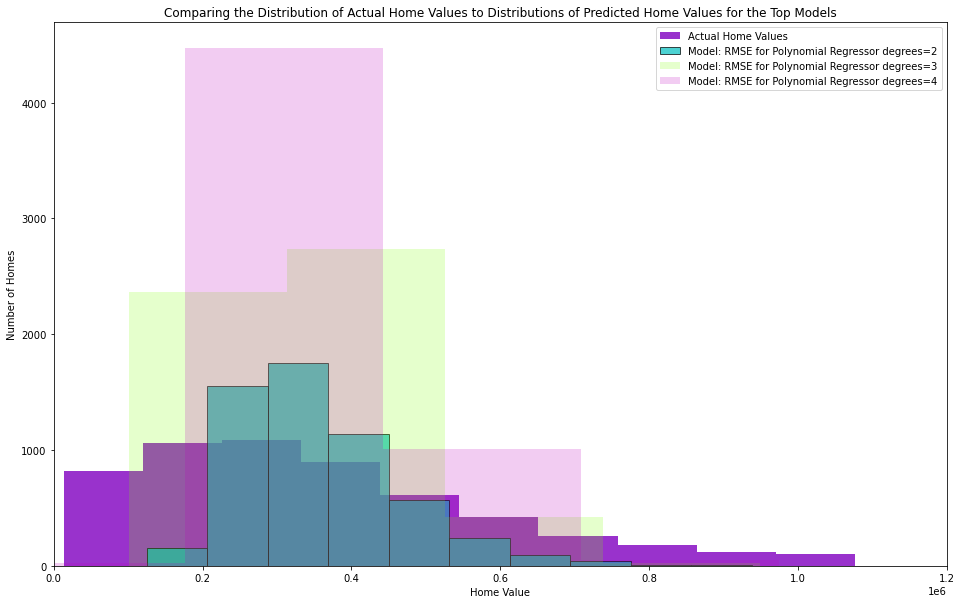

In [33]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,10))
plt.hist(y_validate.home_value, color='darkorchid', alpha=1, label="Actual Home Values")
plt.hist(y_validate.home_value_pred_lm2, color='c', alpha=.7, label="Model: RMSE for Polynomial Regressor degrees=2", ec='black')
plt.hist(y_validate.home_value_pred_lm3, color='chartreuse', alpha=.2, label="Model: RMSE for Polynomial Regressor degrees=3")
plt.hist(y_validate.home_value_pred_lm4, color='m', alpha=.2, label="Model: RMSE for Polynomial Regressor degrees=4")
#plt.hist(y_validate.home_value_pred_lm, color='gold', alpha=.2, label="Model: LinearRegression")
plt.xlim(0, 1200000)
plt.xlabel("Home Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Home Values to Distributions of Predicted Home Values for the Top Models")
plt.legend()
plt.show()

 [Jump to Table of Contents](#toc)

___
# <a name="test"></a>• Test

In [34]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['home_value_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.home_value, y_test.home_value_pred_lm2)**(0.5)

print(f"""
    RMSE for Polynomial Regressor degrees=2
    
    Test/Out-of-Sample Performance: {round(rmse_test, 2)}
""")


    RMSE for Polynomial Regressor degrees=2
    
    Test/Out-of-Sample Performance: 201740.36



This model can **definitely** use some work...

 [Jump to Table of Contents](#toc)

___
# <a name="requested-data"></a>• Requested Data

I'd like to begin by pulling in the entire `df` to satisfy the requested features:
- the state and county information for all of the properties
- distribution of tax rates for each county
    - tax amounts and tax value of the home

In [35]:
full = wr.zillow_full()

In [36]:
full.head(3)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01


#### Read in [`fips.csv`](fips.csv) to append the necessary county/state features onto the df.

In [37]:
#read in `fips.csv` to append the necessary county/state features onto the df.

fips = pd.read_csv('fips.csv', delimiter='\t')
fips.head()

,FIPS,Name,State
0,6001,Alameda,CA
1,6003,Alpine,CA
2,6005,Amador,CA
3,6007,Butte,CA
4,6009,Calaveras,CA


In [38]:
#rename columns
fips = fips.rename(columns={"FIPS": "fips", "Name": "county", "State": "state"})

In [39]:
#merge the two dataframes 
#on the feature they have in common
#`fips`

full = pd.merge(full, fips, how='inner')
full.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,county,state
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01,Orange,CA
1,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01,Orange,CA
2,13984101,2963523,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,309919.0,6151.38,None,NaN,6.059042e+13,11,-0.147997,2017-01-02,Orange,CA
3,14705431,2116302,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,463974.0,6675.04,None,NaN,6.059099e+13,12,-0.028835,2017-01-02,Orange,CA
4,13944538,249412,13.0,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,223051.0,4078.08,None,NaN,6.059089e+13,13,0.045602,2017-01-02,Orange,CA


In [13]:
full.county.unique()

array(['Orange', 'Ventura', 'Los Angeles'], dtype=object)

In [9]:
full.fips.unique()

array([6059., 6111., 6037.])

In [40]:
full.taxamount.isnull().sum()

5

In [42]:
full[full['taxamount'].isnull()]

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,county,state
4412,14646889,162202,1.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,...,20804.0,NaN,None,NaN,6.059063e+13,16804,-0.013861,2017-03-14,Orange,CA
30409,11666665,272990,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,...,1581759.0,NaN,None,NaN,6.037263e+13,5366,-0.043649,2017-01-25,Los Angeles,CA
35141,11647249,1451273,NaN,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,461231.0,NaN,None,NaN,6.037265e+13,12405,0.038192,2017-02-24,Los Angeles,CA
44082,11487838,555782,NaN,NaN,NaN,1.0,3.0,NaN,6.0,1.0,...,754533.0,NaN,None,NaN,6.037621e+13,26165,0.689382,2017-04-13,Los Angeles,CA
52497,12920381,39253,NaN,NaN,NaN,2.0,3.0,NaN,5.0,2.0,...,277000.0,NaN,None,NaN,6.037406e+13,39122,-0.121397,2017-05-24,Los Angeles,CA


In [41]:
full.taxvaluedollarcnt.isnull().sum()

1

Removed any nulls from the features I'll be using.

In [44]:
full = full[full['taxamount'].notna()]

In [46]:
full = full[full['taxvaluedollarcnt'].notna()]

In [47]:
full.taxvaluedollarcnt.isnull().sum()

0

Handling Outliers

<AxesSubplot:xlabel='taxvaluedollarcnt'>

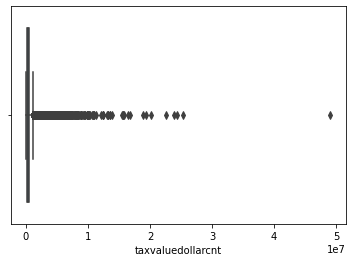

In [49]:
sns.boxplot(x="taxvaluedollarcnt", data=full)
#YOWZAH!That'll skew the data!

In [51]:
upper_bound, lower_bound = wr.outlier(full, "taxvaluedollarcnt", 1.5)
upper_bound, lower_bound

(1112152.25, -336253.75)

In [52]:
full.taxvaluedollarcnt.describe()

count    7.757400e+04
mean     4.901297e+05
std      6.537877e+05
min      1.000000e+03
25%      2.068985e+05
50%      3.588780e+05
75%      5.690000e+05
max      4.906124e+07
Name: taxvaluedollarcnt, dtype: float64

In [54]:
# let's remove them upper outliers (1.5).
full = full[full.taxvaluedollarcnt < upper_bound]
full.shape

# OG count: 77574

(72389, 64)

<AxesSubplot:xlabel='taxvaluedollarcnt'>

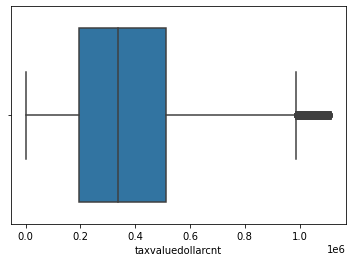

In [55]:
sns.boxplot(x="taxvaluedollarcnt", data=full)
#MUCH better!

Create new feature `tax_rates` to create distribution

In [57]:
full['tax_rates'] = full.taxamount / full.taxvaluedollarcnt
full.head(3)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,county,state,tax_rates
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01,Orange,CA,0.010763
1,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01,Orange,CA,0.011488
2,13984101,2963523,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,6151.38,None,NaN,6.059042e+13,11,-0.147997,2017-01-02,Orange,CA,0.013044


In [62]:
# create copies of df
# one with all LA County properties
# one with all Orange County properties
# another with all Ventura County properties
lac = full[full.fips == 6037]
oc = full[full.fips == 6059]
vc = full[full.fips == 6111]

In [63]:
lac.head(2)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,county,state,tax_rates
26883,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,1777.51,None,NaN,6.037300e+13,3,-0.10341,2017-01-01,Los Angeles,CA,0.012247
26884,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,1533.89,None,NaN,6.037124e+13,4,0.00694,2017-01-01,Los Angeles,CA,0.012846


In [64]:
lac.shape, oc.shape, vc.shape

((47331, 65), (19059, 65), (5999, 65))

In [102]:
lac.tax_rates.median(), lac.tax_rates.mean()

(0.01260719512195122, 0.013899760236500193)

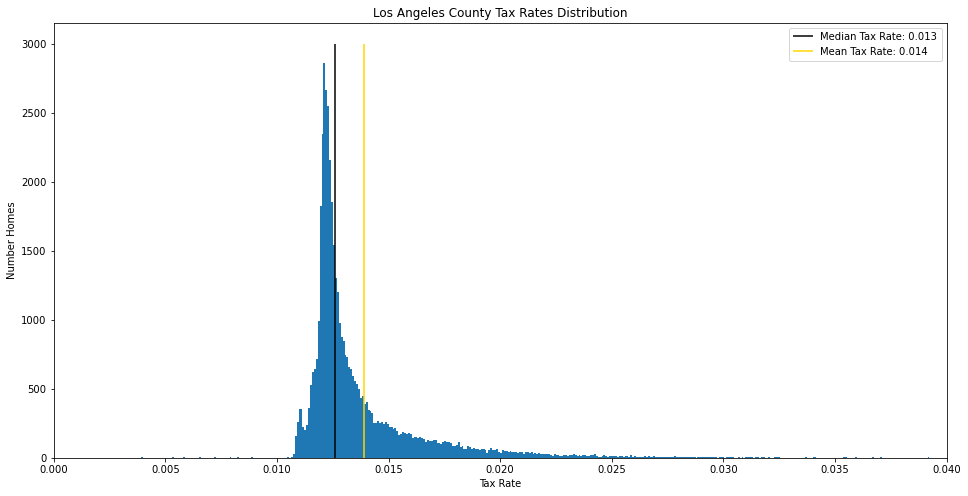

In [105]:
plt.figure(figsize=(16,8))
plt.hist(lac.tax_rates, bins=9500)
plt.vlines(lac.tax_rates.median(), 0, 3000, color='black', label="Median Tax Rate: 0.013")
plt.vlines(lac.tax_rates.mean(), 0, 3000, color='gold', label="Mean Tax Rate: 0.014")
plt.xlim(0, 0.04)
plt.xlabel("Tax Rate")
plt.ylabel("Number Homes")
plt.title("Los Angeles County Tax Rates Distribution")
plt.legend()

In [106]:
oc.tax_rates.median(), oc.tax_rates.mean()

(0.011664205306757167, 0.012142596820525457)

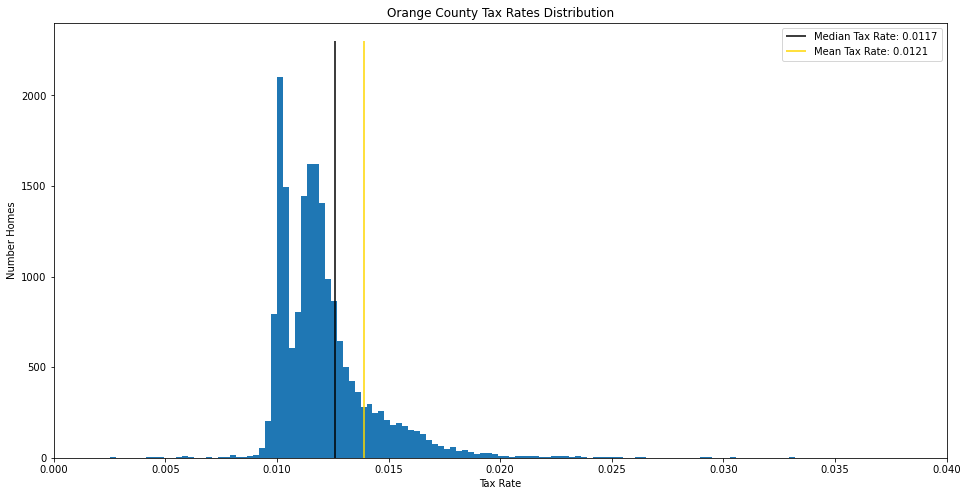

In [108]:
plt.figure(figsize=(16,8))
plt.hist(oc.tax_rates, bins=1000)
plt.vlines(lac.tax_rates.median(), 0, 2300, color='black', label="Median Tax Rate: 0.0117")
plt.vlines(lac.tax_rates.mean(), 0, 2300, color='gold', label="Mean Tax Rate: 0.0121")
plt.xlim(0, 0.04)
plt.ylim(0, 2400)
plt.xlabel("Tax Rate")
plt.ylabel("Number Homes")
plt.title("Orange County Tax Rates Distribution")
plt.legend()

In [107]:
vc.tax_rates.median(), vc.tax_rates.mean()

(0.011266977320642127, 0.011938933375214988)

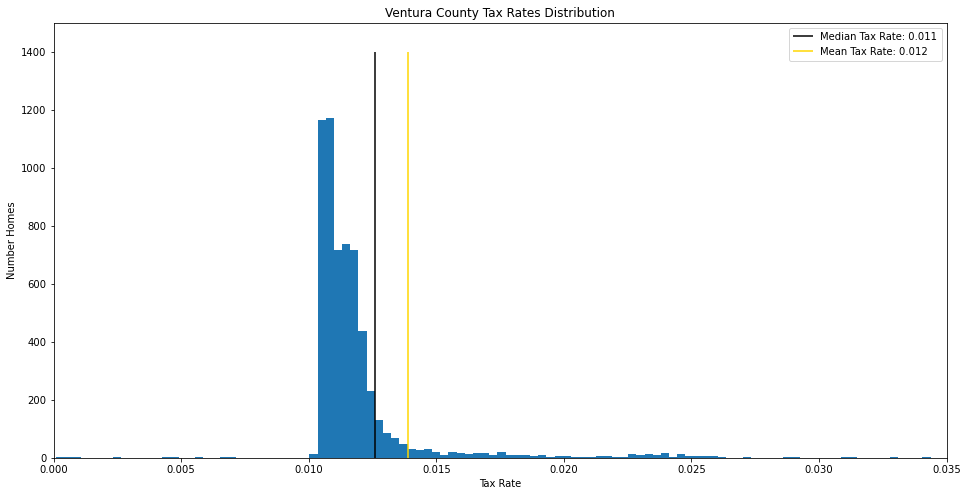

In [109]:
plt.figure(figsize=(16,8))
plt.hist(vc.tax_rates, bins=920)
plt.vlines(lac.tax_rates.median(), 0, 1400, color='black', label="Median Tax Rate: 0.011")
plt.vlines(lac.tax_rates.mean(), 0, 1400, color='gold', label="Mean Tax Rate: 0.012")
plt.xlim(0, 0.035)
plt.ylim(0, 1500)
plt.xlabel("Tax Rate")
plt.ylabel("Number Homes")
plt.title("Ventura County Tax Rates Distribution")
plt.legend()

 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-acquire-data"></a>8. 2nd Iteration: Acquire Data
 
That includes the required restrictions on properties and timeframe.

In [2]:
dff = wr.get_zillow()

In [3]:
dff.head(2)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,11721753,616260,NaN,None,None,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
1,11289917,2061546,1.0,None,None,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23


In [4]:
# identify the feaatures to work with for this iteration

cols = ['parcelid',
        'bathroomcnt',
        'bedroomcnt', 
        'calculatedfinishedsquarefeet', 
        'fips',
        'lotsizesquarefeet', 
        'yearbuilt', 
        'taxvaluedollarcnt', 
        'taxamount']

In [5]:
#rewrite the df to only include these wanted columns
dff = dff[cols]

In [6]:
#again, append fips.csv

fips = pd.read_csv('fips.csv', delimiter='\t')

In [7]:
fips = fips.rename(columns={"FIPS": "fips", "Name": "county", "State": "state"})

In [8]:
zdf = pd.merge(dff, fips, how='inner')
zdf.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,county,state
0,11721753,2.0,3.0,1316.0,6037.0,5672.0,1923.0,205123.0,2627.48,Los Angeles,CA
1,11289917,2.0,3.0,1458.0,6037.0,8284.0,1970.0,136104.0,2319.90,Los Angeles,CA
2,11637029,2.0,3.0,1766.0,6037.0,25082.0,1980.0,810694.0,9407.01,Los Angeles,CA
3,11705026,1.0,2.0,1421.0,6037.0,6707.0,1911.0,35606.0,543.69,Los Angeles,CA
4,11446756,2.0,3.0,1491.0,6037.0,5000.0,1955.0,107110.0,1399.27,Los Angeles,CA


 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-clean-prep-and-split-data"></a>9. 2nd Iteration: Clean, Prep & Split Data


**Much** exploring happened this time around that unfortunately led to *disappointment*. 

1. With just the restriction of the situation, I only left with 2 of the 3 counties (***technically***). only one property was in Orange county that would eventually be eliminated in the outliers portion.

2. I created a new feature `home_age` that didn't really much correlation to the `home_value`. So I left the feature `yearbuilt`, rather than add an iteration of it.

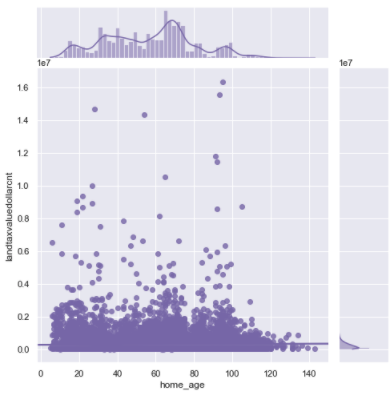

3. Then there was my last idea:
- What if houses located in the coastal zip codes have a higher `home_value`?!
Let me save you some heart ache...
Given the transaction dates and single unit household restrictions, no homes sold from **any** of the LA or Orange County *coastal* zip code. 

4. I again checked my outliers:

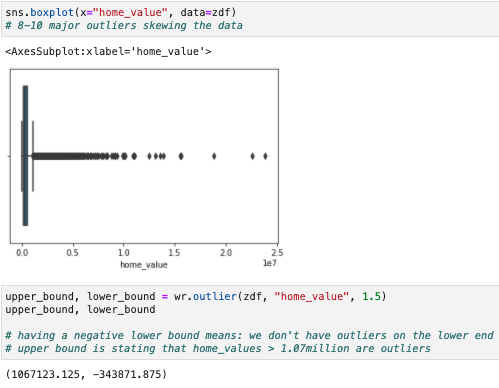 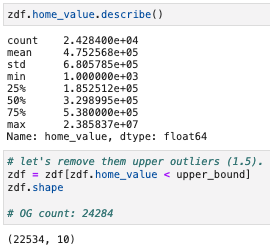

And decided to move forward with the removal of `home_value` outliers (using Tukey's multiplier) only.


5. I again found myself with no categorical features!

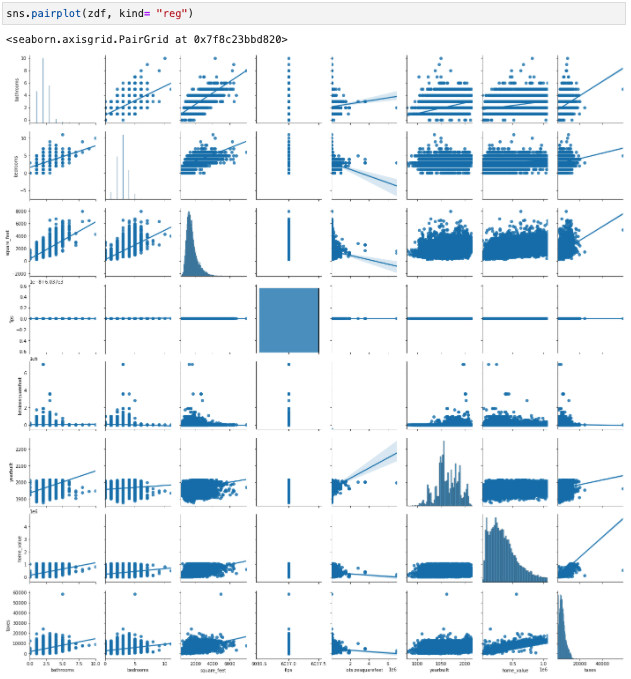

So I decided to create a new column: `bdrm_3` that returned 1 if it was a 3 bedroom household, else: 0. I planned on testing the home'es value based on if it was an average 3 bedroom house.



With all this disappointment in mind, I'd like to fast forward to my newly cleaned data:

### using `clean_z2()` from [`wrangle.py`](wrangle.py)

In [9]:
zdf = wr.clean_z2(zdf)
zdf.head(3)

,bathrooms,bedrooms,square_feet,fips,lotsizesquarefeet,yearbuilt,home_value,taxes,bdrm_3
parcelid,,,,,,,,,
11721753,2.0,3.0,1316.0,6037,5672.0,1923,205123.0,2627.48,1
11289917,2.0,3.0,1458.0,6037,8284.0,1970,136104.0,2319.90,1
11637029,2.0,3.0,1766.0,6037,25082.0,1980,810694.0,9407.01,1


### Split Data

In [10]:
train, validate, test = wr.split_zillow(zdf)

In [11]:
train.shape, validate.shape, test.shape

((12618, 9), (5409, 9), (4507, 9))

In [12]:
train_scaled, validate_scaled, test_scaled = wr.scale_zillow(train, validate, test)

In [13]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((12618, 9), (5409, 9), (4507, 9))

 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-explore-data"></a>10. 2nd Iteration: Explore Data

In [15]:
#identify my categorical and quantitative features:

quant_vars = ['home_value','bedrooms', 'bathrooms', 'square_feet', 'lotsizesquarefeet', 'taxes']
cat_vars = ['fips', 'bdrm_3', 'yearbuilt']

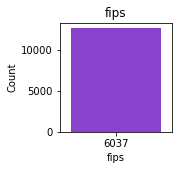

      fips  Count  Percent
6037  6037  12618    100.0
_________________________________________________________________


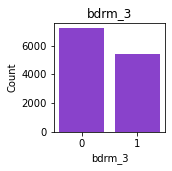

   bdrm_3  Count  Percent
0       0   7196    57.03
1       1   5422    42.97
_________________________________________________________________


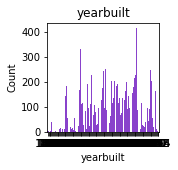

      yearbuilt  Count  Percent
1950       1990    414     3.28
1953       1957    388     3.07
1955       2002    377     2.99
1954       1927    330     2.62
1956       1994    314     2.49
...         ...    ...      ...
1893       1896      1     0.01
1894       1902      1     0.01
1902       1901      1     0.01
1887       1887      1     0.01
1888       1900      1     0.01

[126 rows x 3 columns]
_________________________________________________________________


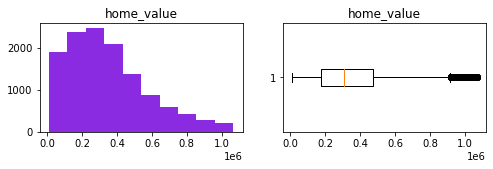

count    1.261800e+04
mean     3.502432e+05
std      2.282851e+05
min      1.108900e+04
25%      1.760095e+05
50%      3.082095e+05
75%      4.716788e+05
max      1.066012e+06
Name: home_value, dtype: float64


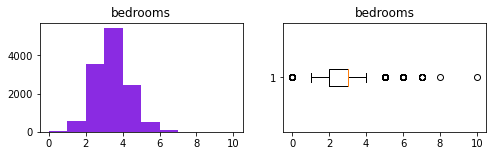

count    12618.000000
mean         2.903550
std          0.956103
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: bedrooms, dtype: float64


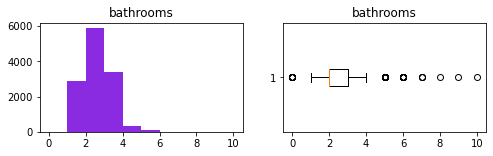

count    12618.000000
mean         2.122365
std          0.828529
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


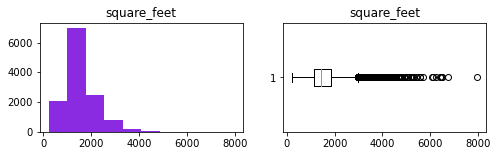

count    12618.000000
mean      1577.349342
std        670.826541
min        240.000000
25%       1124.000000
50%       1436.000000
75%       1860.000000
max       7942.000000
Name: square_feet, dtype: float64


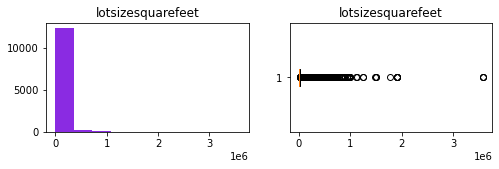

count    1.261800e+04
mean     3.985298e+04
std      1.218255e+05
min      7.360000e+02
25%      5.997000e+03
50%      7.538500e+03
75%      1.711950e+04
max      3.589145e+06
Name: lotsizesquarefeet, dtype: float64


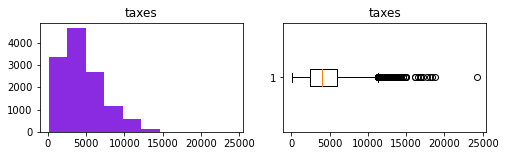

count    12618.000000
mean      4514.474610
std       2746.169091
min        142.980000
25%       2441.292500
50%       4032.455000
75%       5983.162500
max      24234.620000
Name: taxes, dtype: float64


In [16]:
exp.explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:>

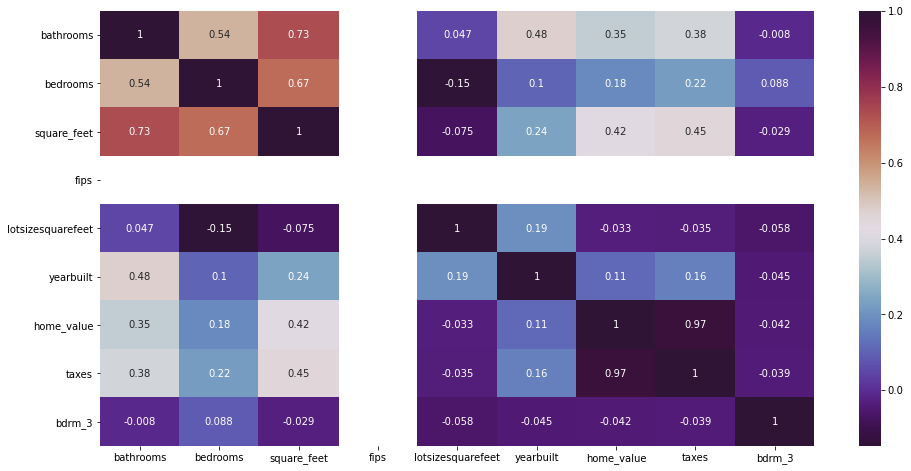

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(train_scaled.corr(), cmap='twilight_shifted', annot=True)


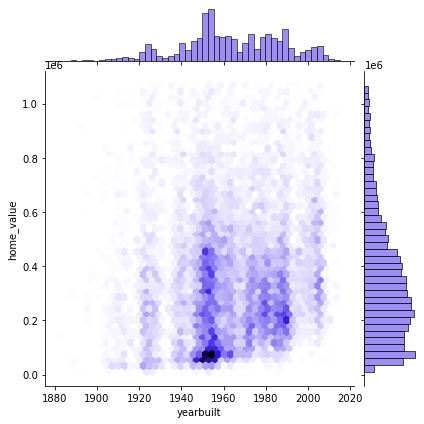

In [18]:
exp.jointplot("yearbuilt", "home_value", train)

During this exploration I learned:
- even though 3 bedrooms are the mean & median, they are not the majority.
- as I introduced more features, my correlation coefficients increased
- a majority of average valued homes from the dataset were built in the 50's-60's.


 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-hypothesis-testing"></a>• 2nd Iteration: Hypothesis Testing
## Test: Three bedroom homes have the same value as the other homes.

In [19]:
# create copies of df
# one with all of the 3 bdrm homes
# another with the remaining homes
bdrm_3 = train[train.bdrm_3 == 1]
bdrm_not3 = train[train.bdrm_3 == 0]

In [20]:
bdrm_3_hv = bdrm_3.home_value
bdrm_not3_hv = bdrm_3.home_value

In [21]:
null_hypothesis = "Three bedroom homes have the same value as the other homes."
alternative_hypothesis = "Home value for 3 bedroom homes differ from the rest."
confidence_level = .95
a = 1 - confidence_level 

In [22]:
t, p = stats.ttest_ind(bdrm_3_hv, bdrm_not3_hv)
t, p

(0.0, 1.0)

In [23]:
if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

We fail to reject the null hypothesis
Not enough evidence to support the claim: Three bedroom homes have the same value as the other homes.


### Test: There IS a correlation between the size of lot and home value.

In [24]:
nullh = "No correlation between the size of lot and home value."
alth = "There IS a correlation between the size of lot and home value."
x4 = train_scaled.lotsizesquarefeet
y4 = train_scaled.home_value

Reject null statment: No correlation between the size of lot and home value.
There is a linear relationship.
Although, it is a negative weak one.

    Correlation Coefficient: -0.033128086414984444
    p: 0.00019770855406558245
    
    


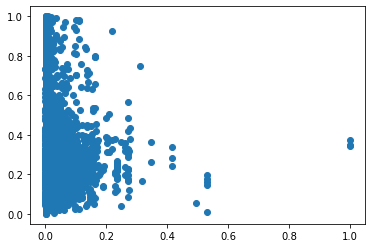

In [25]:
exp.correlation_test(nullh, alth, x4, y4)

### Test: There IS a correlation between the year built and home value.

In [26]:
nullh = "No correlation between the year built and home value."
alth = "There IS a correlation between the year built and home value."
x5 = train_scaled.yearbuilt
y5 = train_scaled.home_value

Reject null statment: No correlation between the year built and home value.
There is a linear relationship.
Although, it is a positive weak one.

    Correlation Coefficient: 0.11414514066348158
    p: 7.298523421514887e-38
    
    


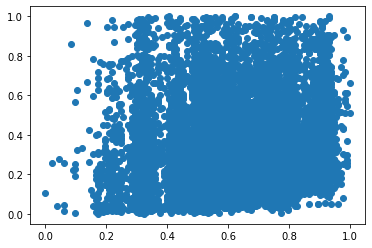

In [27]:
exp.correlation_test(nullh, alth, x5, y5)

 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-modeling"></a>11. 2nd Iteration: Modeling

In [28]:
X_train, X_train_scaled, y_train, X_validate, X_validate_scaled, y_validate, X_test, X_test_scaled, y_test = mo.prep4model(zdf, 'home_value')

#### Check feature importance

In [29]:
# get the features
f_feature = mo.select_kbest(X_train_scaled, y_train, 3)
f_feature

['bathrooms', 'square_feet', 'taxes']

In [30]:
rfe_feature = mo.rfe(X_train_scaled, y_train, 3)
rfe_feature 

['bathrooms', 'bedrooms', 'taxes']

In [31]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-identify-baseline"></a>• 2nd Iteration: Identify Baseline

In [32]:
#1. compute pred_median
home_value_baseline_median = y_train['home_value'].median()
y_train['home_value_baseline_median'] = home_value_baseline_median
y_validate['home_value_baseline_median'] = home_value_baseline_median

In [33]:
#2. compute pred_mean
home_value_baseline_mean = y_train['home_value'].mean()
y_train['home_value_baseline_mean'] = home_value_baseline_mean
y_validate['home_value_baseline_mean'] = home_value_baseline_mean

In [34]:
y_train.head()

,home_value,home_value_baseline_median,home_value_baseline_mean
parcelid,,,
11632933,397283.0,308209.5,350243.199873
12585127,481000.0,308209.5,350243.199873
11569747,950000.0,308209.5,350243.199873
11390936,365015.0,308209.5,350243.199873
11874371,169940.0,308209.5,350243.199873


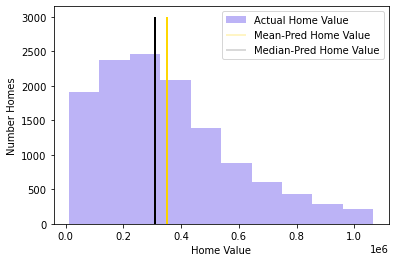

In [35]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.home_value, color='mediumslateblue', alpha=.5, label="Actual Home Value")
plt.vlines(y_train.home_value_baseline_mean, 0, 3000, color='gold', alpha=.3, label="Mean-Pred Home Value")
plt.vlines(y_train.home_value_baseline_median, 0, 3000, color='black', alpha=.2, label="Median-Pred Home Value")
plt.xlabel("Home Value")
plt.ylabel("Number Homes")
plt.legend()
plt.show()

In [36]:
#3. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.home_value, y_train.home_value_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validate.home_value, y_validate.home_value_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 232113.75
      Validate/Out-of-Sample: 235030.88
        


 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-train-validate"></a>• 2nd Iteration: Train / Validate

# Modeling: LinearRegression (OLS)

In [37]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm)**(0.5)

# predict validate
y_validate['home_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 232113.75
              Validate/Out-of-Sample: 235030.88

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 57184.28
    Validation/Out-of-Sample: 82442.8



# Modeling: LassoLars

In [38]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.home_value, y_train.home_value_pred_lars)**(0.5)

# predict validate
y_validate['home_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 232113.75
              Validate/Out-of-Sample: 235030.88
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 57184.28
                Validation/Out-of-Sample: 82442.8

    RMSE for LassoLars
    
    Training/In-Sample: 57186.15
    Validation/Out-of-Sample: 82413.04



# Modeling: TweedieRegressor (GLM)

In [39]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.home_value, y_train.home_value_pred_glm)**(0.5)

# predict validate
y_validate['home_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
""")



              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 232113.75
              Validate/Out-of-Sample: 235030.88
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 57184.28
                Validation/Out-of-Sample: 82442.8

                RMSE for LassoLars
                
                Training/In-Sample: 57186.15
                Validation/Out-of-Sample: 82413.04
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: 228276.06
    Validation/Out-of-Sample: 230762.6



# Modeling: PolynomialFeatures

In [41]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [42]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.home_value)

# predict train
y_train['home_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm2)**(0.5)

# predict validate
y_validate['home_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 232113.75
              Validate/Out-of-Sample: 235030.88
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 57184.28
                Validation/Out-of-Sample: 82442.8

                RMSE for LassoLars
                
                Training/In-Sample: 57186.15
                Validation/Out-of-Sample: 82413.04
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 228276.06
                Validation/Out-of-Sample: 230762.6
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 1047628.59
    Validation/Out-of-Sample: 1044229.95



## Try a Cubic Funct?

In [43]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf3.transform(X_validate)
X_test_degree3 = pf3.transform(X_test)

In [44]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.home_value)

# predict train
y_train['home_value_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train_lm3 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm3)**(0.5)

# predict validate
y_validate['home_value_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate_lm3 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm3)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: {round(rmse_train_lm3, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 232113.75
              Validate/Out-of-Sample: 235030.88
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 57184.28
                Validation/Out-of-Sample: 82442.8

                RMSE for LassoLars
                
                Training/In-Sample: 57186.15
                Validation/Out-of-Sample: 82413.04
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 228276.06
                Validation/Out-of-Sample: 230762.6
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 1047628.59
                Validation/Out-of-Sample: 1044229.95
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: 990767

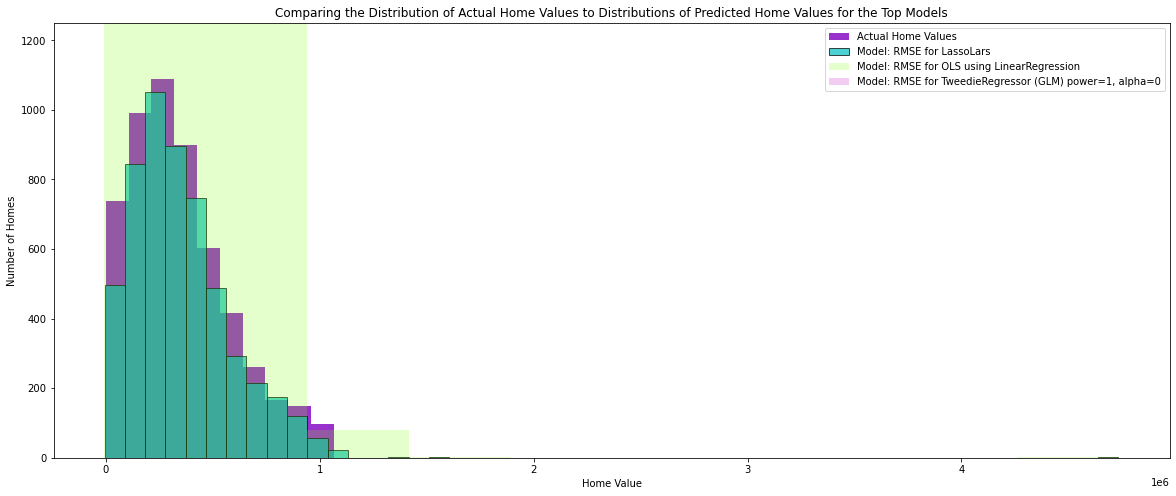

In [56]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(20,8))
plt.hist(y_validate.home_value, color='darkorchid', alpha=1, label="Actual Home Values")
plt.hist(y_validate.home_value_pred_lars, color='c', bins=50, alpha=.7, label="Model: RMSE for LassoLars", ec='black')
plt.hist(y_validate.home_value_pred_lm, color='chartreuse', alpha=.2, label="Model: RMSE for OLS using LinearRegression")
plt.hist(y_validate.home_value_pred_glm, color='m', alpha=.2, label="Model: RMSE for TweedieRegressor (GLM) power=1, alpha=0")

plt.xlabel("Home Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Home Values to Distributions of Predicted Home Values for the Top Models")
plt.legend()
plt.ylim(0, 1250)
#plt.xlim(0, 1250)
plt.show()

 [Jump to Table of Contents](#toc)

___
# <a name="2nd-iteration-test"></a>• 2nd Iteration: Test

In [58]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['home_value_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.home_value, y_test.home_value_pred_lars)**(0.5)

print(f"""
    RMSE for LassoLars
    
    Test/Out-of-Sample Performance: {rmse_test}
""")


    RMSE for LassoLars
    
    Test/Out-of-Sample Performance: 54754.14554598433



## Holy cow is that better!


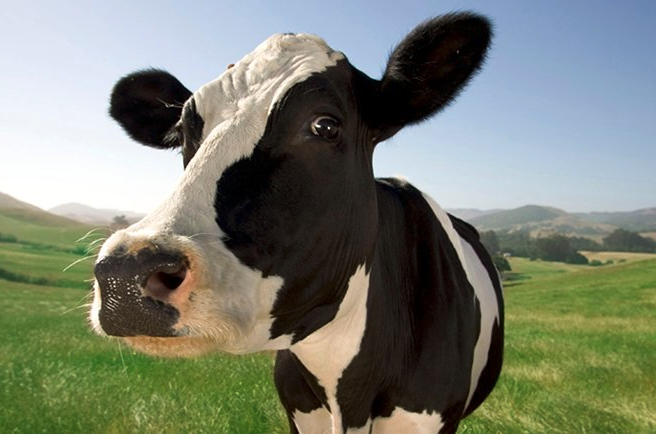


<a id='bottom'></a>

 [Jump to the top of Repo](#top)